In [2]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('cricketers.csv')
data.head(10)

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.00,0.00
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.00,0.00
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.00,0.00
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.00,0.00
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.00,0.00
5,Ambati Rayudu,16,16,602,100,402,43.00,149.75,0,0.0,0,0,0.00,0.00
6,Andre Russell,16,14,316,88,171,28.72,184.79,15,37.5,355,13,27.30,9.38
7,Andrew Tye,14,8,32,14,38,5.33,84.21,14,56.0,448,24,18.66,8.00
8,Axar Patel,9,8,80,19,69,13.33,115.94,8,26.0,218,3,72.66,8.38
9,Ben Cutting,9,6,96,37,58,24.00,165.51,7,17.0,168,2,84.00,9.88


In [4]:
data.shape

(109, 14)

In [5]:
data.describe()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000
mean,9.559633,7.889908,173.633028,43.495413,124.669725,22.360092,122.258716,4.513761,13.894495,119.93578,3.926606,17.334862,5.149817
std,5.161164,4.982078,182.356522,29.830268,123.670265,16.093453,48.576709,5.449456,18.395495,152.80763,5.602094,21.910816,4.773435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,36.000000,20.000000,33.000000,11.800000,109.090000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10.000000,7.000000,99.000000,40.000000,76.000000,21.160000,130.260000,2.000000,3.000000,27.00000,0.000000,0.000000,7.280000
75%,14.000000,13.000000,260.000000,62.000000,188.000000,30.000000,146.040000,8.000000,26.000000,223.00000,6.000000,28.360000,9.230000
max,17.000000,17.000000,735.000000,128.000000,516.000000,75.830000,300.000000,17.000000,68.000000,533.00000,24.000000,108.000000,16.500000


In [6]:
data.sample(15)

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
49,Mahipal Lomror,2,2,20,11,21,20.00,95.23,2,3.0,27,0,0.00,9.00
105,Avesh Khan,0,0,0,0,0,0.00,0.00,6,19.0,204,4,51.00,10.73
30,Gautam Gambhir,6,5,85,55,88,17.00,96.59,0,0.0,0,0,0.00,0.00
70,Ravichandran Ashwin,14,9,102,45,71,12.75,143.66,14,50.4,410,10,41.00,8.09
76,Sam Billings,10,8,108,56,78,13.50,138.46,0,0.0,0,0,0.00,0.00
103,Ankit Sharma,0,0,0,0,0,0.00,0.00,1,1.0,11,0,0.00,11.00
7,Andrew Tye,14,8,32,14,38,5.33,84.21,14,56.0,448,24,18.66,8.00
23,David Miller,3,3,74,26,64,37.00,115.62,0,0.0,0,0,0.00,0.00
87,Shubman Gill,13,11,203,57,139,33.83,146.04,0,0.0,0,0,0.00,0.00
32,Harbhajan Singh,13,3,29,19,36,9.66,80.55,12,31.5,270,7,38.57,8.48


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLAYER                   109 non-null    object 
 1   matches_played           109 non-null    int64  
 2   innings_batted           109 non-null    int64  
 3   runs_scored              109 non-null    int64  
 4   highest_runs             109 non-null    int64  
 5   balls_faced              109 non-null    int64  
 6   average_runs             109 non-null    float64
 7   strike_rate              109 non-null    float64
 8   innings_bowled           109 non-null    int64  
 9   overs                    109 non-null    float64
 10  runs_given               109 non-null    int64  
 11  wickets_obtained         109 non-null    int64  
 12  average_runs_per_wicket  109 non-null    float64
 13  bowling_economy          109 non-null    float64
dtypes: float64(5), int64(8), o

In [8]:
#clean data
data.isna().sum()

PLAYER                     0
matches_played             0
innings_batted             0
runs_scored                0
highest_runs               0
balls_faced                0
average_runs               0
strike_rate                0
innings_bowled             0
overs                      0
runs_given                 0
wickets_obtained           0
average_runs_per_wicket    0
bowling_economy            0
dtype: int64

In [9]:
duplicate = data.duplicated()
print(duplicate.sum())
data[duplicate]

0


,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy


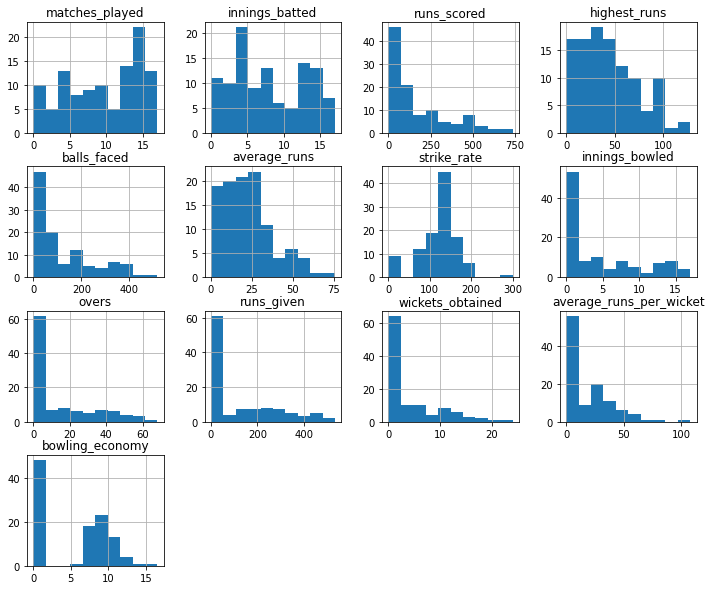

In [10]:
#plot histogram for attributes of type number(float and int)
data.select_dtypes(include='number').hist(figsize=(12,10))
plt.show()

## 1. Given that K-means depends on distance metric, it is a convention to normalize the data attributes so that attributes are on the same scale.  So, in this first task, normalize all data attributes. [2 points]

In [11]:
#Normalize data
df= data.copy()
#df['index'] = df.index
print(df.head())
print(df.info())
df.drop(['PLAYER'], axis=1,inplace = True)
print(df.info())
features = df.columns
print(features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

            PLAYER  matches_played  innings_batted  runs_scored  highest_runs  \
0      Aaron Finch              10               9          134            46   
1   AB de Villiers              12              11          480            90   
2  Abhishek Sharma               3               3           63            46   
3   Ajinkya Rahane              15              14          370            65   
4       Alex Hales               6               6          148            45   

   balls_faced  average_runs  strike_rate  innings_bowled  overs  runs_given  \
0          100         16.75       144.00               0    0.0           0   
1          275         53.33       174.54               0    0.0           0   
2           33         63.00       190.90               0    0.0           0   
3          313         28.46       118.21               0    0.0           0   
4          118         24.66       125.42               0    0.0           0   

   wickets_obtained  average_run

## 2. Write your own code for K-means algorithm using two attributes namely average_runs and bowling_economy. Take K=2  . Plot clusters on a scatter plot with X and Y being the two attributes namely average_runs and bowling_economy, respectively. Color data points belonging to the first cluster with red and the second cluster with blue. Copy the plot diagram in the word document and interpret the output. [3 points]

In [12]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
cluster_data = df[['average_runs','bowling_economy']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['average_runs','bowling_economy'], inplace=True)
cluster_array = np.array(cluster_data)

In [14]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [15]:
# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [16]:
# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [17]:
# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [18]:
k = 2
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 13908
1 7123
2 6457
3 6347
4 6275
5 6241
6 6236
7 6215
8 6124
9 6097
10 6097
11 6097
12 6097
13 6097
14 6097
15 6097
16 6097
17 6097
18 6097
19 6097
20 6097


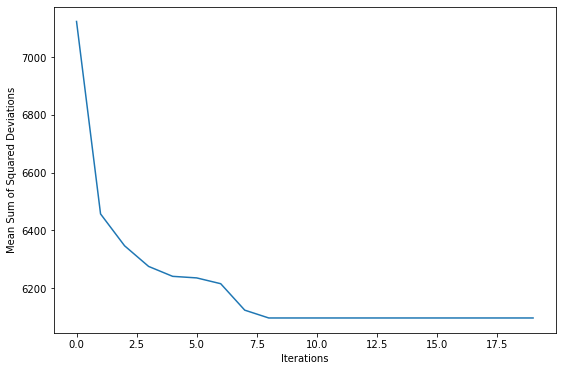

In [19]:
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.savefig('mean_ssd')

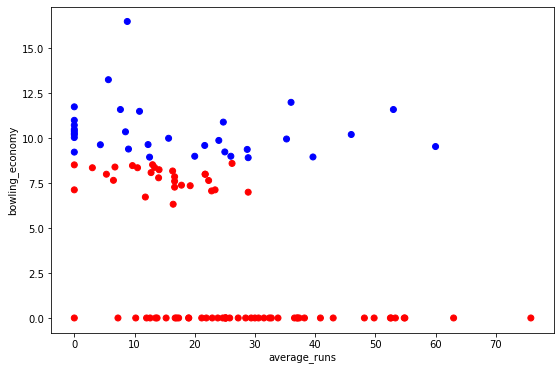

In [20]:
plt.subplots(figsize=(9,6))
LABEL_COLOR_MAP = {0 : 'red',
                    1: 'blue'}
label_color = [LABEL_COLOR_MAP[l] for l in initial_clusters]
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=label_color);
plt.xlabel('average_runs')
plt.ylabel('bowling_economy');
plt.savefig('initial_clusters')

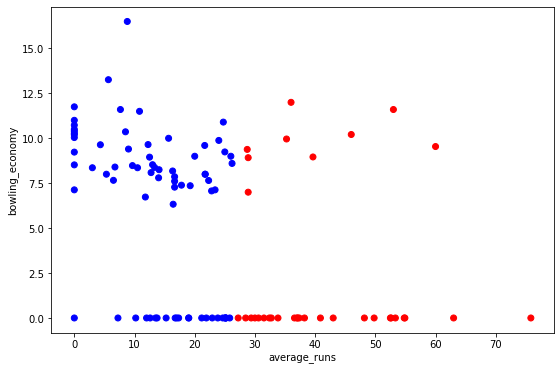

In [22]:
plt.subplots(figsize=(9,6))
LABEL_COLOR_MAP = {0 : 'red',
                    1: 'blue'}
label_color = [LABEL_COLOR_MAP[l] for l in clusters]
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=label_color);
plt.xlabel('average_runs')
plt.ylabel('bowling_economy');
plt.savefig('final_clusters')

## 3. Redo question-2 on different values of K = 2,3,4,5. For each case, draw the plot of clusters as stated above. Visualize these plots, copy the plot diagrams in the word document,  and comment on which is better clustering (and reasons) based on visualization only. [3 points]

0 13908
1 7123
2 6457
3 6347
4 6275
5 6241
6 6236
7 6215
8 6124
9 6097
10 6097
11 6097
12 6097
13 6097
14 6097
15 6097
16 6097
17 6097
18 6097
19 6097
20 6097


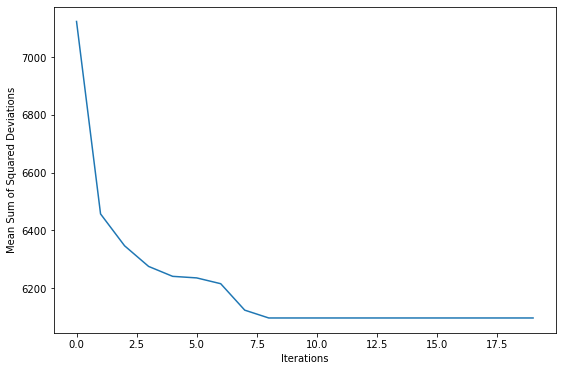

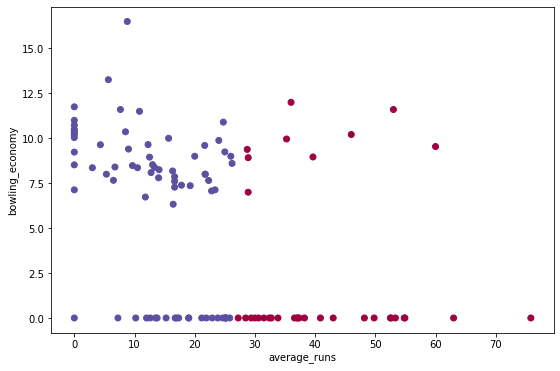

In [23]:
k = 2
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))
    
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.savefig('mean_ssd')

plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('average_runs')
plt.ylabel('bowling_economy');
plt.savefig('final_clusters')

0 8948
1 4288
2 3467
3 2501
4 2206
5 2200
6 2180
7 2162
8 2148
9 2148
10 2148
11 2148
12 2148
13 2148
14 2148
15 2148
16 2148
17 2148
18 2148
19 2148
20 2148


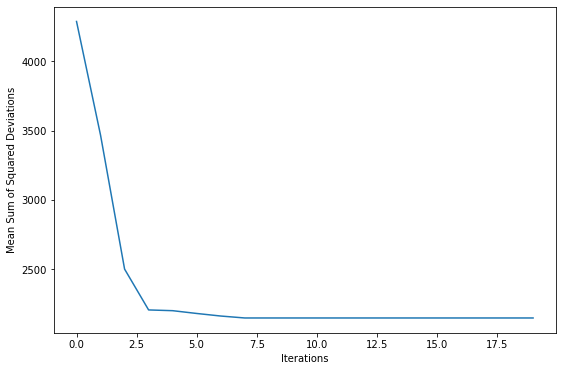

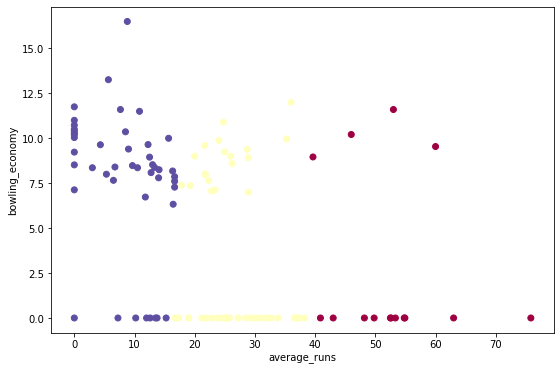

In [24]:
k = 3
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))
    
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.savefig('mean_ssd')

plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('average_runs')
plt.ylabel('bowling_economy');
plt.savefig('final_clusters')

0 6701
1 2900
2 2088
3 1513
4 1257
5 1182
6 1145
7 1133
8 1121
9 1116
10 1115
11 1110
12 1107
13 1105
14 1104
15 1104
16 1104
17 1104
18 1104
19 1104
20 1104


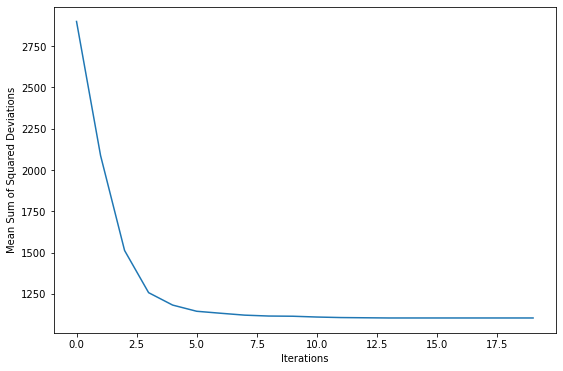

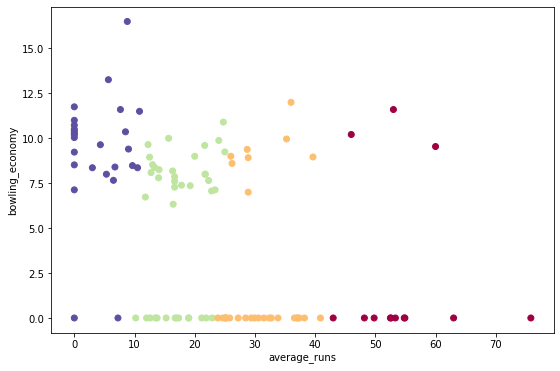

In [25]:
k = 4
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))
    
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.savefig('mean_ssd')

plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('average_runs')
plt.ylabel('bowling_economy');
plt.savefig('final_clusters')

0 5310
1 2203
2 1492
3 1103
4 957
5 929
6 907
7 831
8 719
9 690
10 681
11 679
12 679
13 679
14 679
15 679
16 679
17 679
18 679
19 679
20 679


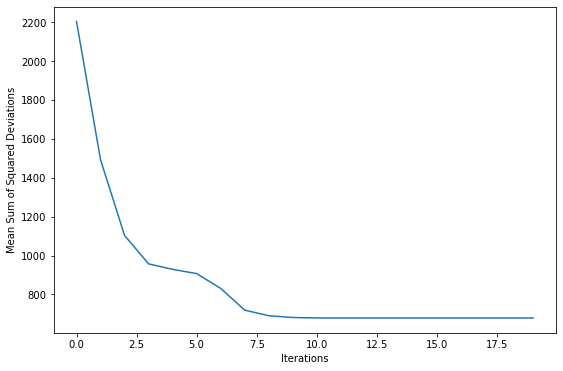

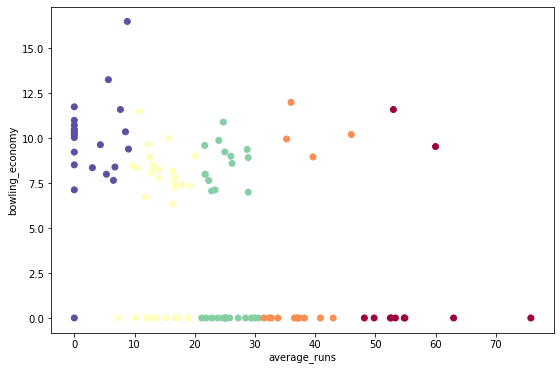

In [26]:
k = 5
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))
    
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.savefig('mean_ssd')

plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('average_runs')
plt.ylabel('bowling_economy');
plt.savefig('final_clusters')